by Jose Manuel Villarreal Martinez

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [16]:
le = LabelEncoder()
df_y=df['y']
df['y']=le.fit_transform(df['y'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df = pd.get_dummies(df, columns=['job','marital','education','default','contact','month','day_of_week','poutcome'])
df.drop(columns=['duration'])

df

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
1,57,0,0,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
2,37,2,0,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
3,40,0,0,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
4,56,0,2,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2,0,334,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,0,0,1,0
41184,46,0,0,383,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,0,189,2,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,0,0,1,0
41186,44,0,0,442,1,999,0,-1.1,94.767,-50.8,...,0,0,1,0,0,0,0,0,1,0


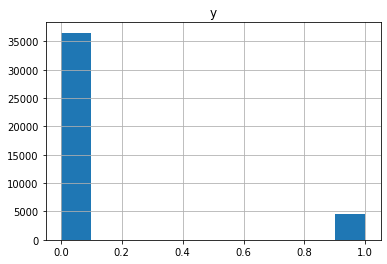

In [17]:
_= df.hist(column=['y'])

In [25]:
# Create separate training and test sets.
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2, random_state=50,stratify=df_y)  
print(len(X_train), len(X_test))

32950 8238


In [26]:
X_dummy = X_train
y_dummy = y_train
dummyClf = DummyClassifier(strategy="stratified")
scores_dummy = cross_val_score(estimator=dummyClf,X=X_dummy,y=y_dummy,scoring="f1",cv=10)
print(scores_dummy.mean())

C:\Python3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Python3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Python3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Python3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Python3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "C:\Python3\lib\site-packages\sklearn\utils\validation.py", line 

In [24]:
X_rf = X_train
y_rf = y_train
clf_rf = RandomForestClassifier(n_estimators=400, max_depth=6)
scores_rf_100 = cross_val_score(estimator=clf_rf,X=X_rf,y=np.array(y_rf).ravel(),scoring='f1',cv=10)
print(scores_rf_100.mean())

C:\Python3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Python3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Python3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Python3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Python3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "C:\Python3\lib\site-packages\sklearn\utils\validation.py", line 